# Nuclei Segmentation using Voronoi-Otsu-Labeling
In this notebook, we will segment nuclei in a given microscopy image using the Voronoi-Otsu-Labeling method. We will use specific Python libraries as described in the issue.

In [1]:
# Import necessary libraries
import numpy as np
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")


## Load the image
We will load the image and ensure to use only the first channel.

In [2]:
# Load image and select the first channel only
image = imread('human_mitosis_small.png')[:, :, 0]

## Apply Voronoi-Otsu-Labeling
We will apply the Voronoi-Otsu-Labeling to segment the nuclei.

In [3]:
# Segment nuclei using Voronoi-Otsu-Labeling
labels = nsbatwm.voronoi_otsu_labeling(image, spot_sigma=3.5, outline_sigma=1)

## Visualize the segmentation result
Display the original image and the segmentation side by side for comparison.


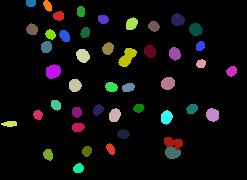

In [4]:
stackview.animate_curtain(image, labels)

## Save the resulting labels as PNG
Convert the label image to np.uint8 before saving.

In [5]:
from skimage import img_as_ubyte
from skimage.io import imsave

# Convert labels to uint8 and save
imsave('segmented_nuclei.png', img_as_ubyte(labels))

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/skimage/util/dtype.py:576: UserWarning: Downcasting int32 to uint8 without scaling because max value 45 fits in uint8
  return _convert(image, np.uint8, force_copy)
